In [1]:
from pathlib import Path
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import re
from gelgenie.segmentation.helper_functions.general_functions import create_dir_if_empty, index_converter
from collections import defaultdict
import pickle
import math
from scipy.stats import linregress
import pingouin

C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# user = 'matthew'
user = 'nathan'
if user == 'matthew':
    base_path = '../../../other_paper_comparisons'
    plt.rcParams.update({'font.sans-serif':'Helvetica'})  # consistent figure formatting
elif user == 'nathan':
    base_path = '../../../paper_data_analysis'
    plt.rcParams.update({'font.sans-serif':'Microsoft Sans Serif'})  # consistent figure formatting

fig2a_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_2_A_band_data.csv'))
fig2b_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_2_B_band_data.csv'))
fig2c_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_2_C_band_data.csv'))
fig2d_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_2_D_band_data.csv'))
figs1A_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_s1_A_band_data.csv'))
figs1C_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_s1_C_band_data.csv'))
figs9A_1_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_s9_A_band_data.csv'))
figs9A_2_df = pd.read_csv(os.path.join(base_path, 'matthew_multiplexed_paper/GelGenie Analysis/fig_s9_A_band_data_2.csv'))
Modification_required = [False, True, False, True, False, False, False, False]

# minor mods required for no-band areas
arun_2022_fig1f = pd.read_csv(os.path.join(base_path, 'arun_data_2022_toehold_clipping/GelGenie Analysis/fig_1F.csv'))

# # minor mods required for no-band areas
arun_2022_fig3f_1 = pd.read_csv(os.path.join(base_path, 'arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_1.csv'))
arun_2022_fig3f_2 = pd.read_csv(os.path.join(base_path, 'arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_2.csv'))
arun_2022_fig3f_3 = pd.read_csv(os.path.join(base_path, 'arun_data_2022_toehold_clipping/GelGenie Analysis/3f_rep_3.csv'))

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_1 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig2c_1.csv'))
arun_2021_multiplexed_2 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig2c_2.csv'))
arun_2021_multiplexed_3 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig2c_3.csv'))

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_4f_dna = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig4f_dna.csv'))
arun_2021_multiplexed_4f_rna = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig4f_rna.csv'))
arun_2021_multiplexed_4f_dig = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig4f_dig.csv'))
arun_2021_multiplexed_4f_sa = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/fig4f_sa.csv'))

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_S4 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS4.csv'))
arun_2021_multiplexed_S4_auto = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS4_auto.csv'))

# # finetune model required - minor mods/additions needed for no-band areas
arun_2021_multiplexed_S5_1 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS5_1.csv'))
arun_2021_multiplexed_S5_2 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS5_2.csv'))
arun_2021_multiplexed_S5_3 = pd.read_csv(os.path.join(base_path, 'arun_data_multiplexed_2021/GelGenie Analysis/figS5_3.csv'))

# # major changes necessary - many bands missed (out-of-distribution data)
arun_2016_nucleic_acid_sensor = pd.read_csv(os.path.join(base_path, 'arun_data_nucleic_acid_sensor_2016/GelGenie Analysis/figS3A.csv'))

# # major changes necessary - many bands missed (out-of-distribution data)
miracles_2b_1 = pd.read_csv(os.path.join(base_path, 'arun_data_miracles_2019/GelGenie Analysis/fig2B_1.csv'))
miracles_2b_2 = pd.read_csv(os.path.join(base_path, 'arun_data_miracles_2019/GelGenie Analysis/fig2B_2.csv'))
miracles_2b_3 = pd.read_csv(os.path.join(base_path, 'arun_data_miracles_2019/GelGenie Analysis/fig2B_3.csv'))

# # major changes necessary - many bands missed (out-of-distribution data)
miracles_3f = pd.read_csv(os.path.join(base_path, 'arun_data_miracles_2019/GelGenie Analysis/fig3F.csv'))

### Combined Analysis of Multiplexing Paper

In [3]:
col_list = []
gel_names = ['2A', '2B', '2C','2D', 'S1A', 'S1C', 'S9A-1', 'S9A-2']
lod_vals = [[False, True, True, False, True, False, True, False, False, True, True],
           [False, True, False, True, False, True, False, False, True, True, True],
            [False]*5,
           [False, True, True, False, True, False, True, False, False, True, True],
           [False]*11,
            [False]*11,
            [False, False, True, True, True, True, True, True],
            [False, False, True, True, True, True, True, True]
           ]

def normalize_by_min_max(x):
    return (x -x.min())/ (x.max()-x.min())
    
def normalize_by_max(x):
    return x / x.max()

for df, name, lod_vals in zip([fig2a_df, fig2b_df, fig2c_df, fig2d_df, figs1A_df, figs1C_df, figs9A_1_df, figs9A_2_df],  gel_names, lod_vals):
    df['Gel Name'] = name
    df['LOD Values'] = lod_vals
    if 'Reference' not in (df.columns):
        df['Reference'] = range(1, len(df)+1)
    col_list.append(df[['Gel Name', 'Reference', 'Previous Analysis', 'Rolling Ball Corrected Volume', 'LOD Values']])

ma_multi_df = pd.concat(col_list)
sel_transform = normalize_by_min_max
ma_multi_df['Norm. Prev. Analysis'] = ma_multi_df.groupby('Gel Name')['Previous Analysis'].transform(sel_transform)
ma_multi_df['Norm. GelGenie'] = ma_multi_df.groupby('Gel Name')['Rolling Ball Corrected Volume'].transform(sel_transform)
ma_multi_df['ABS Error'] = abs(ma_multi_df['Norm. Prev. Analysis'] - ma_multi_df['Norm. GelGenie'])

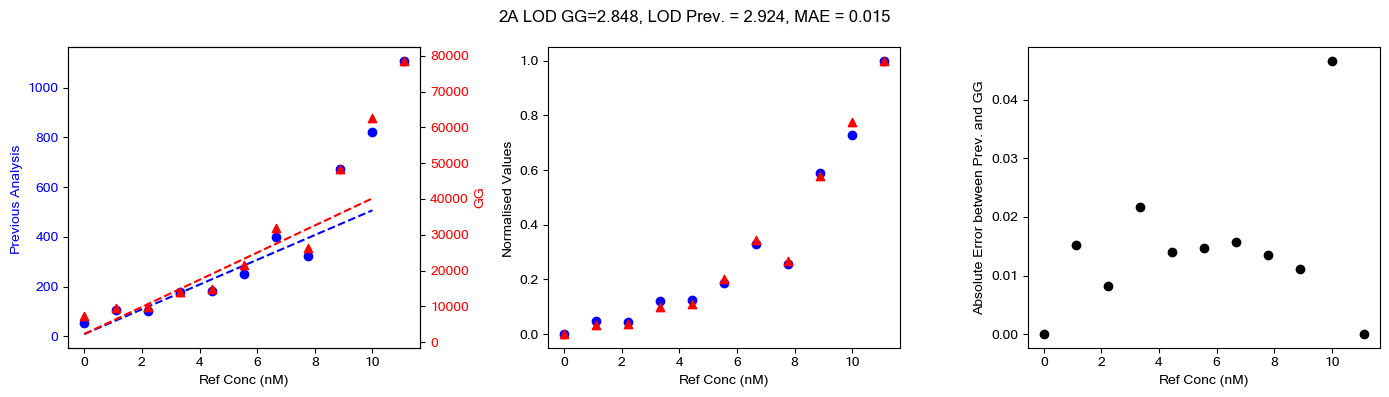

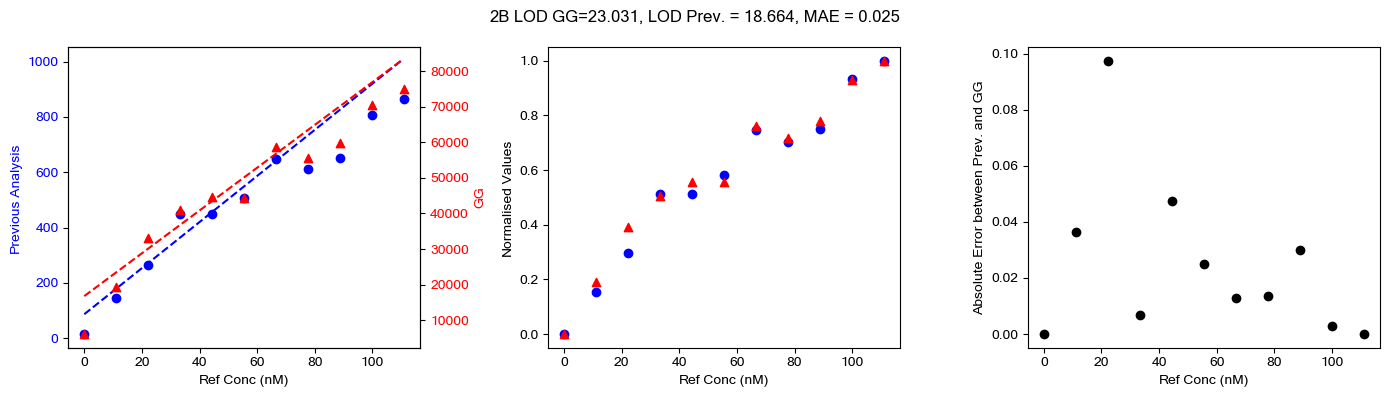

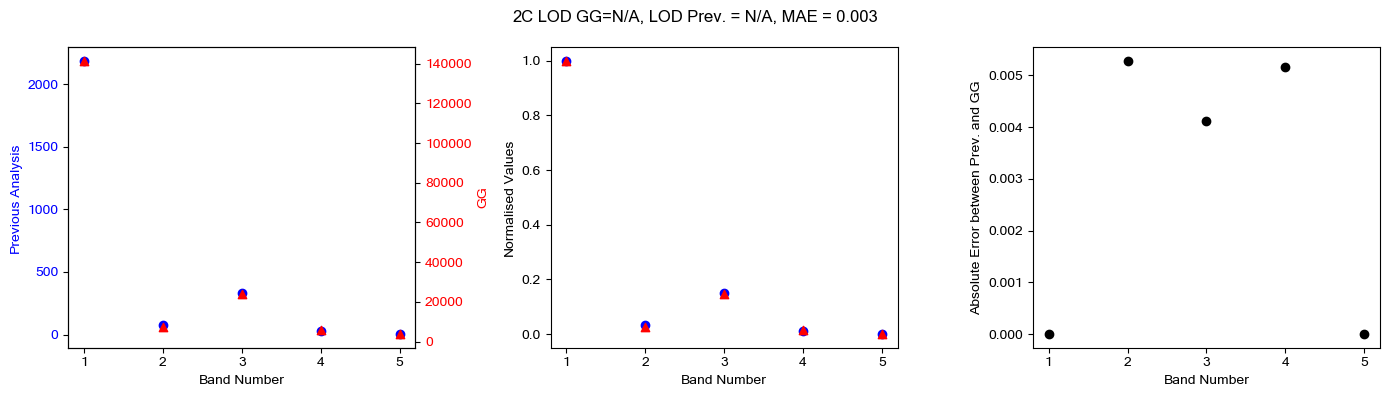

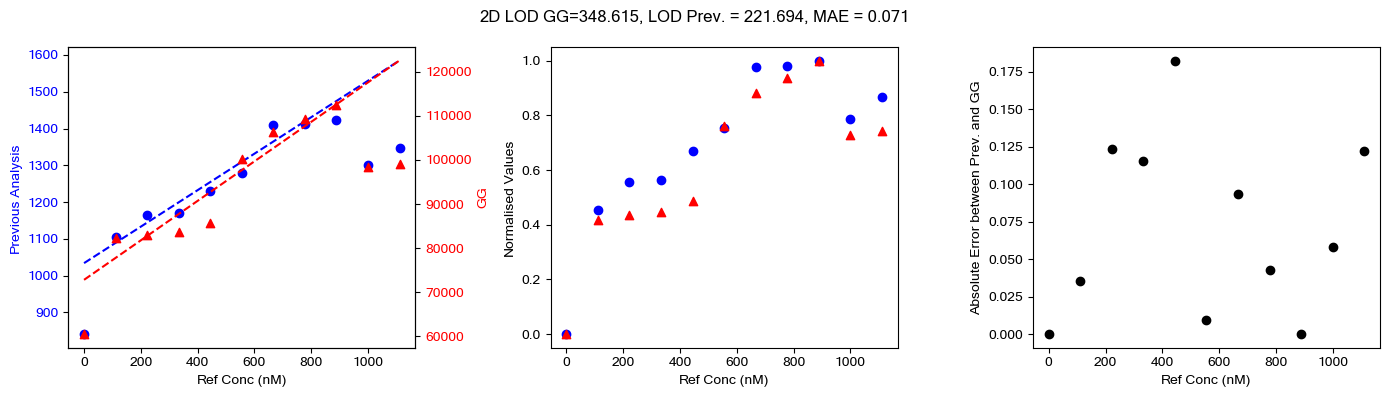

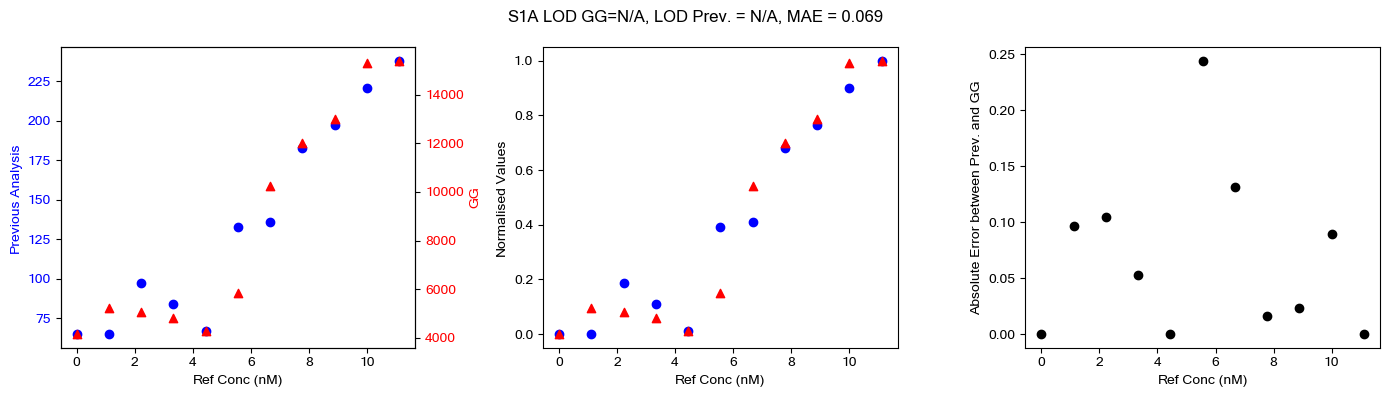

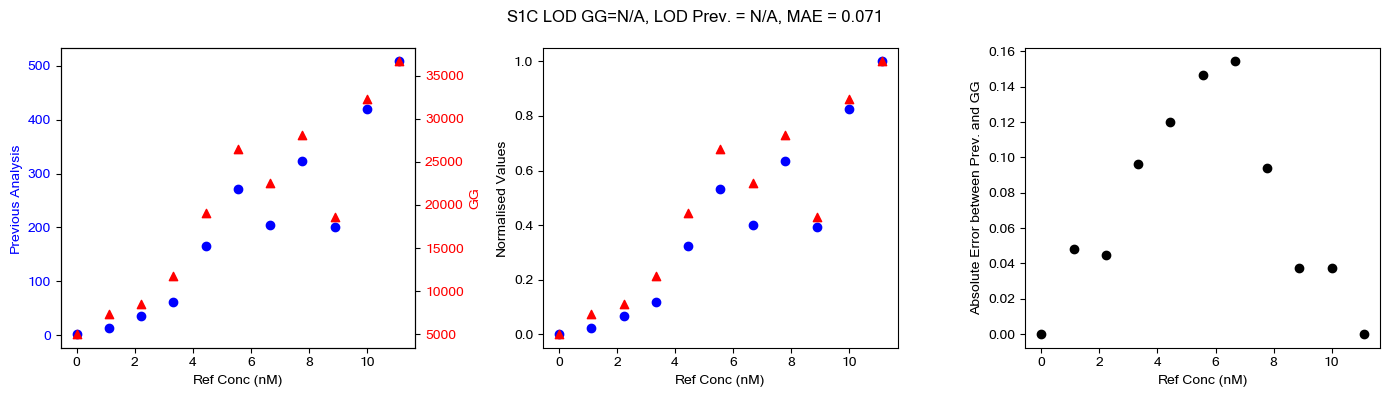

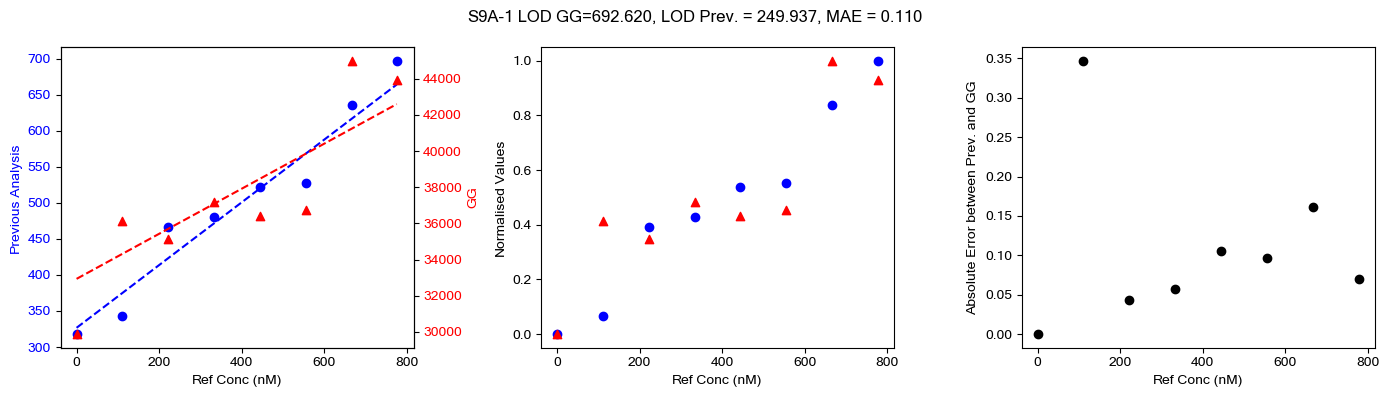

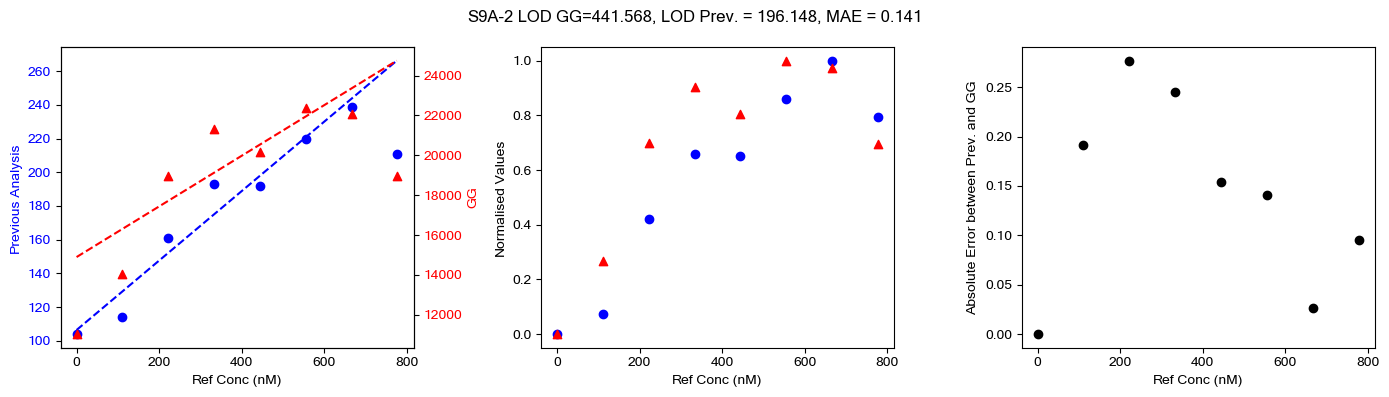

In [4]:
gg_color = 'r'
prev_color = 'blue'
error_color = 'black'

for gel in gel_names:
    df_filt = ma_multi_df[ma_multi_df['Gel Name'] == gel]
    ngg_data = df_filt['Norm. GelGenie']
    np_data = df_filt['Norm. Prev. Analysis']
    gg_data = df_filt['Rolling Ball Corrected Volume']
    p_data = df_filt['Previous Analysis']
    ref_data = df_filt['Reference']

    AE = abs(ngg_data - np_data)
    MAE = np.mean(AE)
    
    if sum(df_filt['LOD Values']) > 0:
        lod_filt = df_filt[df_filt['LOD Values']]
        fit_result_p = linregress(lod_filt['Reference'], lod_filt['Previous Analysis'])
        fit_result_gg = linregress(lod_filt['Reference'], lod_filt['Rolling Ball Corrected Volume'])

        lod_p = 3.3*(fit_result_p.intercept_stderr/fit_result_p.slope)
        lod_gg = 3.3*(fit_result_gg.intercept_stderr/fit_result_gg.slope)
    else:
        lod_p = 'N/A'
        lod_gg = 'N/A'
        
    fig, axs = plt.subplots(1,3, figsize=(14,4))
    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.scatter(ref_data, p_data, c=prev_color)
    ax1.tick_params(axis='y', labelcolor=prev_color)
    ax1.set_xlabel('Ref Conc (nM)')
    ax1.set_ylabel('Previous Analysis', color=prev_color)
    ax1_1 = ax1.twinx() 
    ax1_1.set_ylabel('GG', color=gg_color)  
    ax1_1.scatter(ref_data, gg_data, c=gg_color, marker='^')
    ax1_1.tick_params(axis='y', labelcolor=gg_color)

    if sum(df_filt['LOD Values']) > 0:
        x_vals = range(0, int(max(ref_data)))
        ax1.plot(x_vals, fit_result_p.slope*x_vals + fit_result_p.intercept, c=prev_color, linestyle='dashed')
        ax1_1.plot(x_vals, fit_result_gg.slope*x_vals + fit_result_gg.intercept, c=gg_color, linestyle='dashed')

    ax2.scatter(ref_data, np_data, c=prev_color)
    ax2.scatter(ref_data, ngg_data, c=gg_color, marker='^')
    ax2.set_xlabel('Ref Conc (nM)')
    ax2.set_ylabel('Normalised Values')
    
    ax3.scatter(ref_data, AE, c=error_color)
    ax3.set_xlabel('Ref Conc (nM)')
    ax3.set_ylabel('Absolute Error between Prev. and GG')

    if gel == '2C':
        ax1.set_xlabel('Band Number')
        ax2.set_xlabel('Band Number')
        ax3.set_xlabel('Band Number')
    else:
        ax1.set_xlabel('Ref Conc (nM)')
        ax2.set_xlabel('Ref Conc (nM)')
        ax3.set_xlabel('Ref Conc (nM)')

    if isinstance(lod_gg, str):
        plt.suptitle(gel + ' LOD GG=%s, LOD Prev. = %s, MAE = %.3f' % (lod_gg, lod_p, MAE))
    else:
        plt.suptitle(gel + ' LOD GG=%.3f, LOD Prev. = %.3f, MAE = %.3f' % (lod_gg, lod_p, MAE))

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    # when exporting figures, use the following command:
    # plt.savefig('NAME.pdf' % gel, dpi=300)


C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Gel Name', ylabel='ABS Error'>

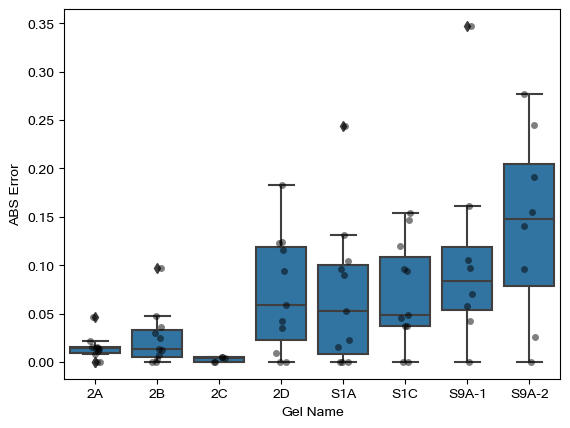

In [5]:
# quick barcharts for each gel

# my interpretation:
# gels 1-3 were clean, clear gels with very distinct bands
# gels 4-6 were so-so - a clear trend was visible in the gel but bands were more diffuse and certain bands in the middle of the distribution introduce more uncertainty
# gels 7-8 are the worst of the dataset - the bands are very similar in intensity and large errors in certain bands skewed the error significantly

sns.boxplot(data=ma_multi_df, x='Gel Name', y='ABS Error', color='tab:blue')
sns.stripplot(data=ma_multi_df, x='Gel Name', y='ABS Error', color='black', alpha=0.5)

## Arun 2022 Toehold Clipping

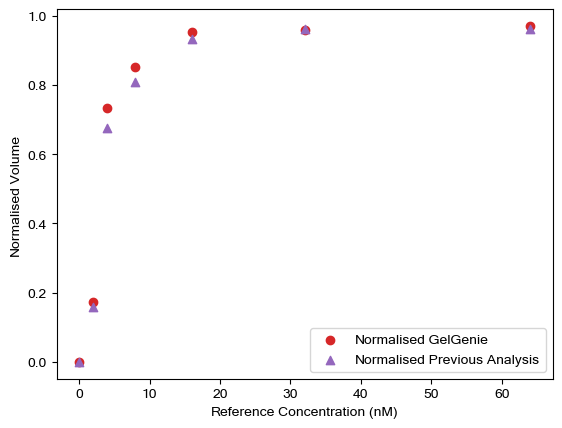

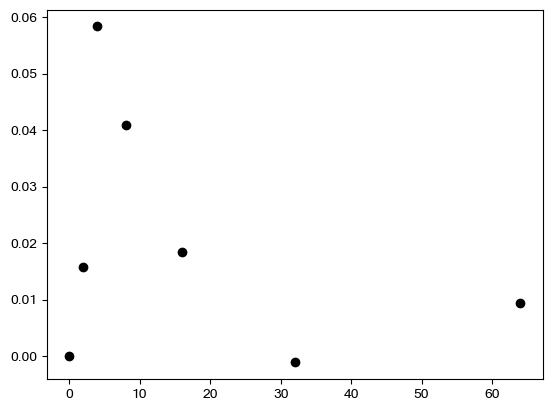

In [6]:
orig_data = np.array(arun_2022_fig1f['Original Analysis'])
gg_data = np.array(arun_2022_fig1f['Raw Volume'])
gg_data_bc = np.array(arun_2022_fig1f['Rolling Ball Corrected Volume'])

orig_data = (orig_data[0] - orig_data)/orig_data[0]
gg_data = (gg_data[0] - gg_data)/gg_data[0]
gg_data_bc = (gg_data_bc[0] - gg_data_bc)/gg_data_bc[0]

plt.scatter(arun_2022_fig1f['Reference'], gg_data_bc, label='Normalised GelGenie', color='tab:red') 
plt.scatter(arun_2022_fig1f['Reference'], orig_data, label='Normalised Previous Analysis', marker='^', color='tab:purple') # used different colour to show it was from a different paper
plt.legend()
plt.xlabel('Reference Concentration (nM)')
plt.ylabel('Normalised Volume')
plt.show()

abs_error = gg_data_bc - orig_data

plt.scatter(arun_2022_fig1f['Reference'], abs_error, color='black') # plotted in the same style as MA multiplex paper
plt.show()

# Could use difference graph (second graph) as an insert in the first graph

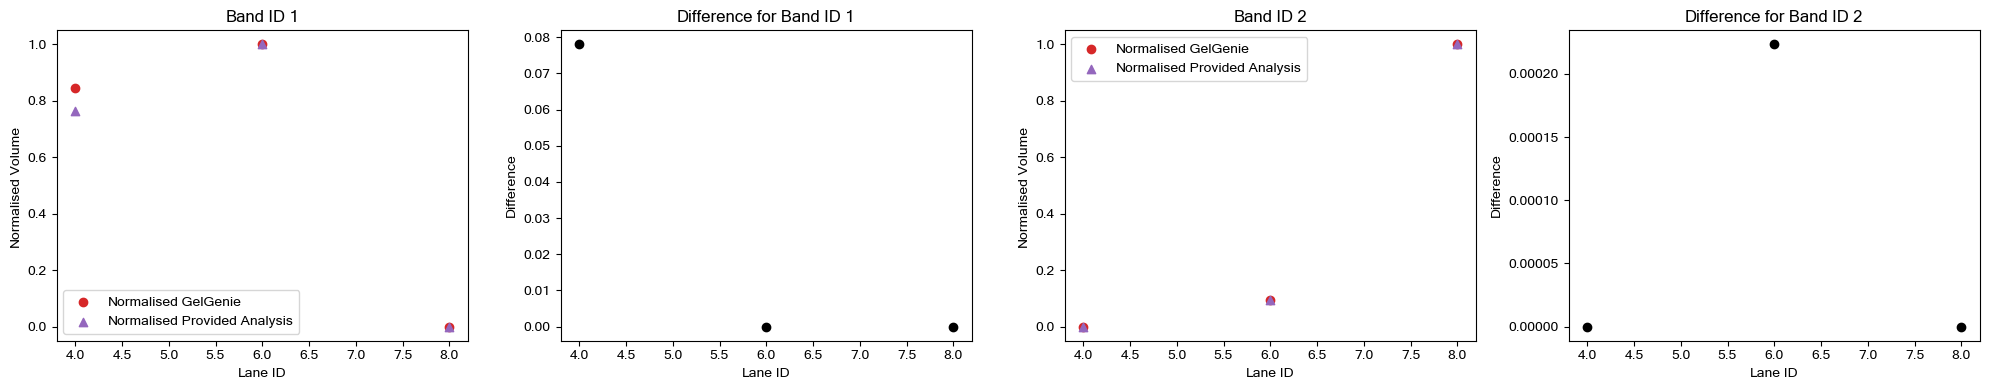

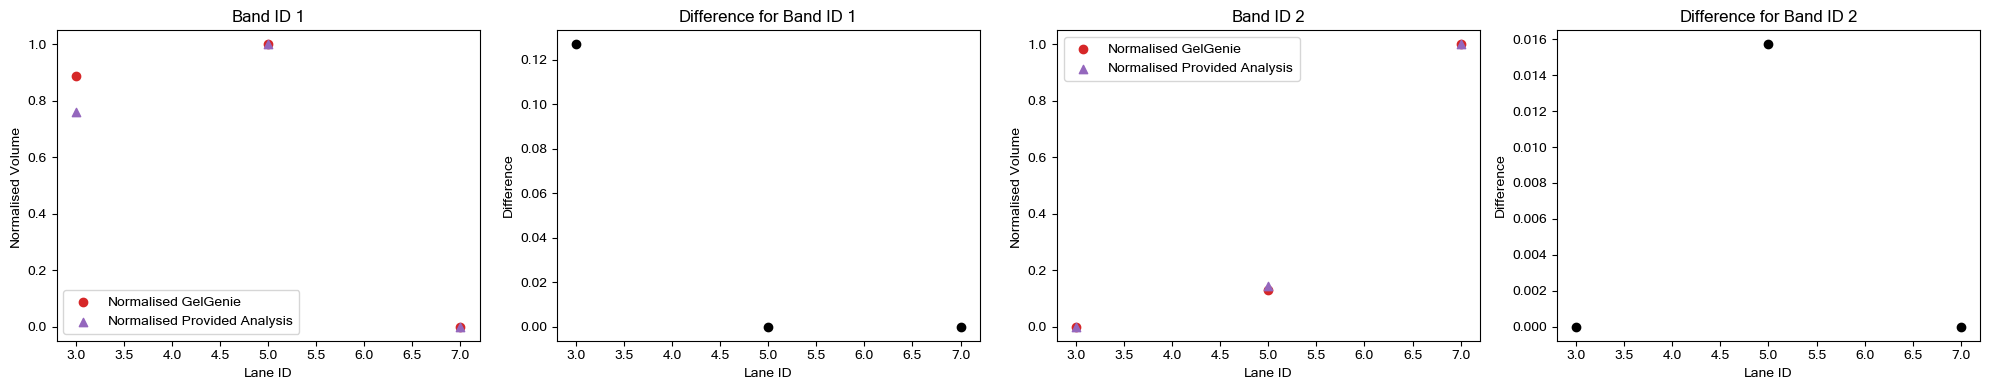

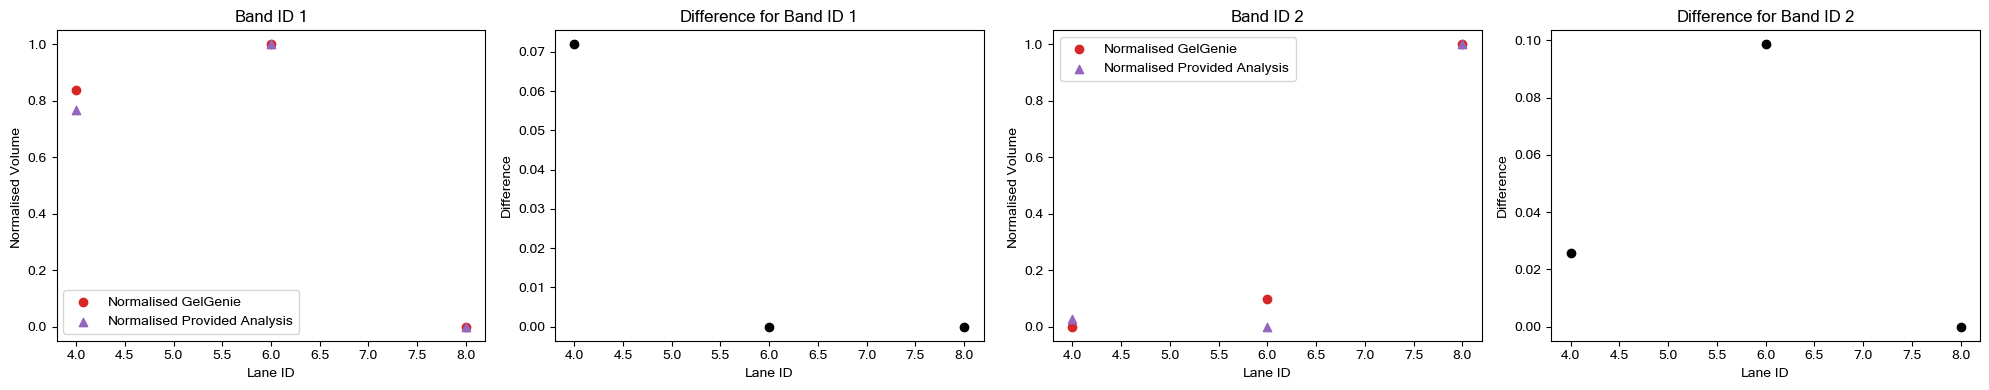

In [18]:
data = [arun_2022_fig3f_1, arun_2022_fig3f_2, arun_2022_fig3f_3]

for df in data:
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))

    for i, band_id in enumerate(df['Band ID'].unique()):
        df_band = df[df['Band ID'] == band_id].copy()

        # Normalizing values
        df_band['Normalised Rolling Ball Corrected Volume'] = (df_band['Rolling Ball Corrected Volume'] - df_band['Rolling Ball Corrected Volume'].min()) / (df_band['Rolling Ball Corrected Volume'].max() - df_band['Rolling Ball Corrected Volume'].min())

        df_band['Normalised Provided Analysis'] = (df_band['Provided Analysis'] - df_band['Provided Analysis'].min()) / (df_band['Provided Analysis'].max() - df_band['Provided Analysis'].min())

        ax1 = axs[i*2]
        ax1.scatter(df_band['Lane ID'], df_band['Normalised Rolling Ball Corrected Volume'], label='Normalised GelGenie', color='tab:red')
        ax1.scatter(df_band['Lane ID'], df_band['Normalised Provided Analysis'], label='Normalised Provided Analysis', marker='^',color='tab:purple')
        ax1.set_title(f'Band ID {band_id}')
        ax1.set_xlabel('Lane ID')
        ax1.set_ylabel('Normalised Volume')
        ax1.legend()

        difference = abs(df_band['Normalised Rolling Ball Corrected Volume'] - df_band['Normalised Provided Analysis'])
        ax2 = axs[i*2 + 1]
        ax2.scatter(df_band['Lane ID'], difference, color='black')
        ax2.set_title(f'Difference for Band ID {band_id}')
        ax2.set_xlabel('Lane ID')
        ax2.set_ylabel('Difference')

    plt.tight_layout()
    plt.show()


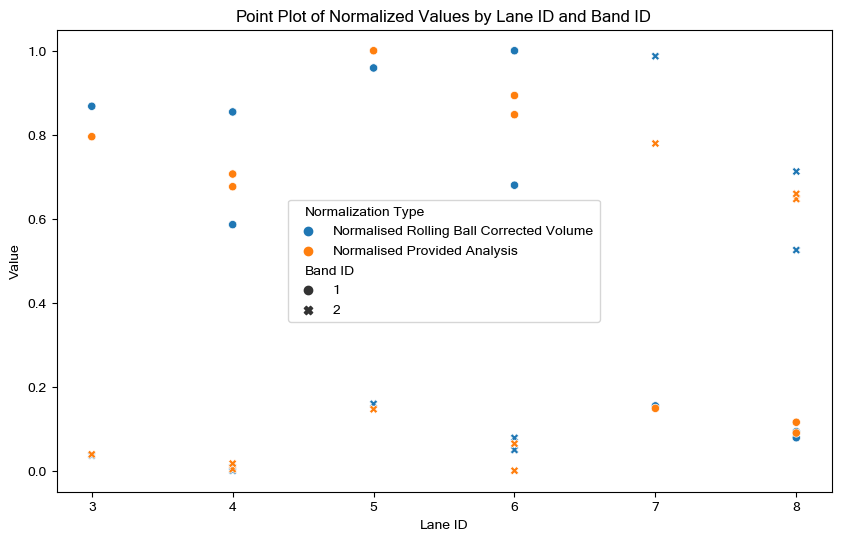

In [29]:
full_df = pd.concat(data, ignore_index=True)

full_df['Normalised Rolling Ball Corrected Volume'] = (full_df['Rolling Ball Corrected Volume'] - full_df['Rolling Ball Corrected Volume'].min()) / (full_df['Rolling Ball Corrected Volume'].max() - full_df['Rolling Ball Corrected Volume'].min())
full_df['Normalised Provided Analysis'] = (full_df['Provided Analysis'] - full_df['Provided Analysis'].min()) / (full_df['Provided Analysis'].max() - full_df['Provided Analysis'].min())

df_melted = full_df.melt(id_vars=['Lane ID', 'Band ID'], 
                    value_vars=['Normalised Rolling Ball Corrected Volume', 'Normalised Provided Analysis'], 
                    var_name='Normalization Type', 
                    value_name='Value')

# Create the point plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_melted, x='Lane ID', y='Value', hue='Normalization Type', style='Band ID')
plt.title('Point Plot of Normalized Values by Lane ID and Band ID')
plt.show()

# I think the best option is to have multiple plots like above

## Arun Multiplexed 2021

<Axes: xlabel='Reference', ylabel='Rolling Ball Corrected Volume'>

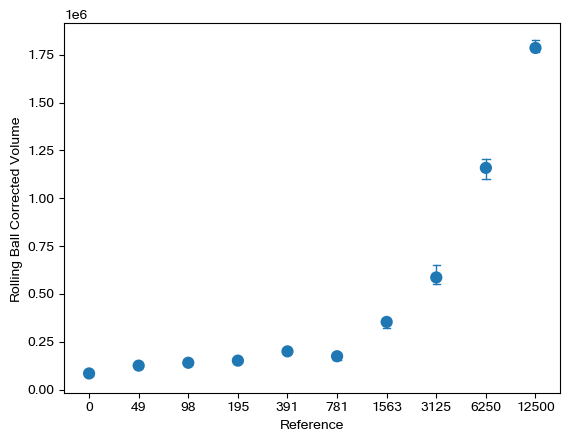

In [9]:
full_arun_multiplexed_df = pd.concat([arun_2021_multiplexed_1, arun_2021_multiplexed_2, arun_2021_multiplexed_3], ignore_index=True)
sns.pointplot(data=full_arun_multiplexed_df, x='Reference', y='Rolling Ball Corrected Volume', join=False, capsize=0.15, errwidth=1, color='tab:blue')

## Arun 2021 Mulitplexed

C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\s1893121\Anaconda3\envs\gel_genie\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

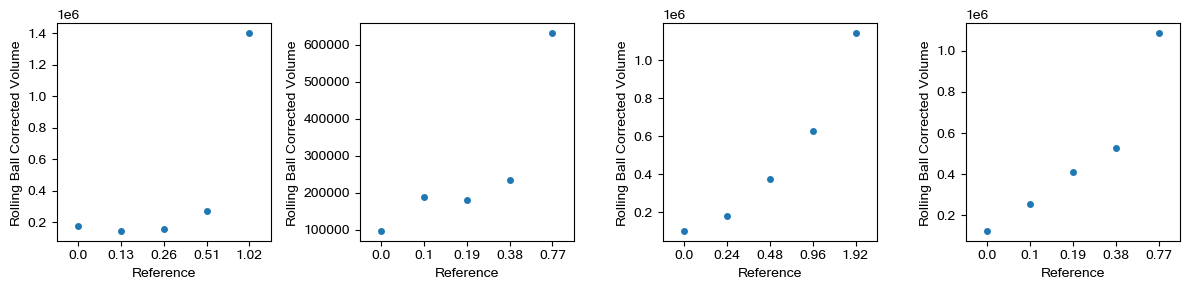

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(12,3))

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_dig, ax=axs[0])

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_rna, ax=axs[1])

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_dna, ax=axs[2])

sns.stripplot(x='Reference', y='Rolling Ball Corrected Volume', data=arun_2021_multiplexed_4f_sa, ax=axs[3])

plt.tight_layout()

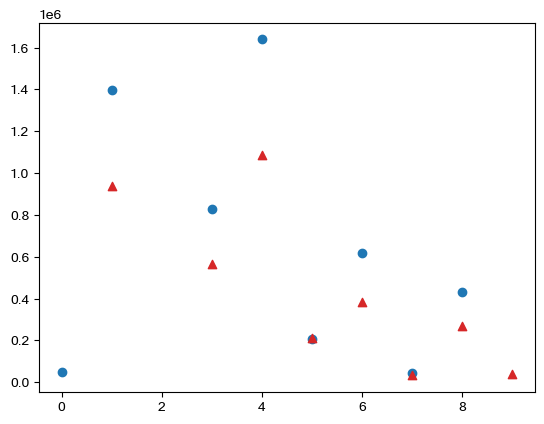

In [11]:
plt.scatter(arun_2021_multiplexed_S4['Lane ID'], arun_2021_multiplexed_S4['Rolling Ball Corrected Volume'], color='tab:blue')
plt.scatter(arun_2021_multiplexed_S4_auto['Lane ID'], arun_2021_multiplexed_S4_auto['Rolling Ball Corrected Volume'], color='tab:red', marker='^')
plt.show()

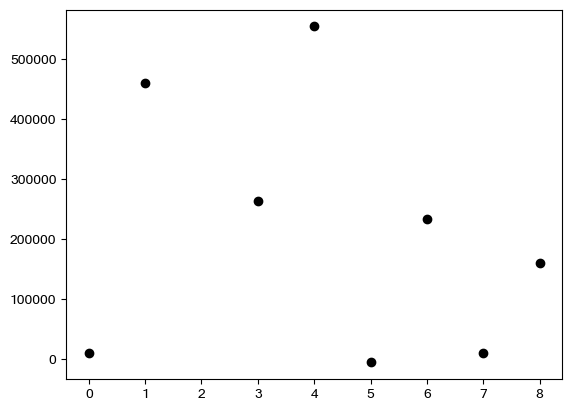

In [12]:
difference = arun_2021_multiplexed_S4['Rolling Ball Corrected Volume'] - arun_2021_multiplexed_S4_auto['Rolling Ball Corrected Volume']
plt.scatter(arun_2021_multiplexed_S4['Lane ID'], difference, color='black')

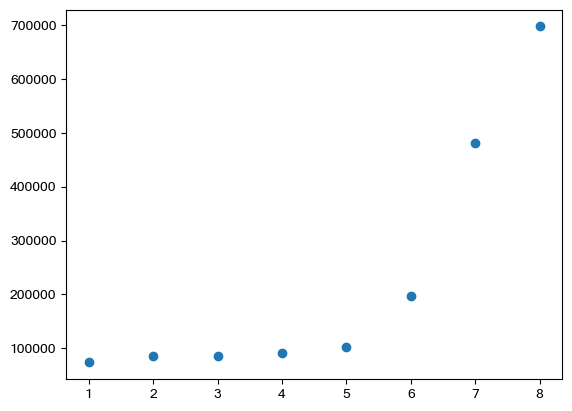

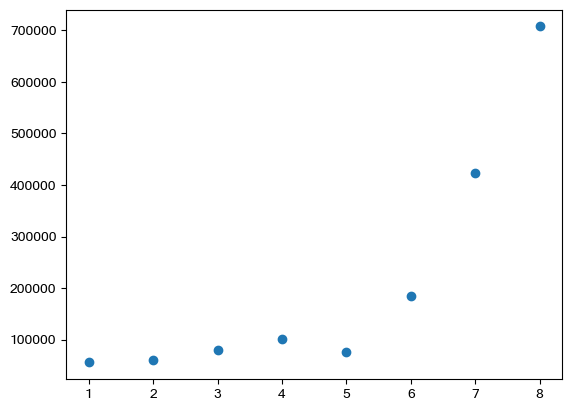

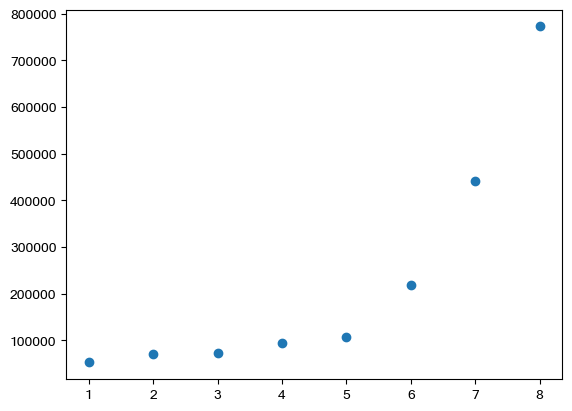

In [13]:
S5 = [arun_2021_multiplexed_S5_1, arun_2021_multiplexed_S5_2, arun_2021_multiplexed_S5_3]

for df in S5:
    plt.scatter(df['Lane ID'], df['Rolling Ball Corrected Volume'], color='tab:blue')
    plt.show()

C:\Users\s1893121\AppData\Local\Temp\ipykernel_16828\2942261320.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=full_df, x='Reference', y='Rolling Ball Corrected Volume', ci='sd', join=False, capsize=0.15, errwidth=1, color='tab:blue')


<Axes: xlabel='Reference', ylabel='Rolling Ball Corrected Volume'>

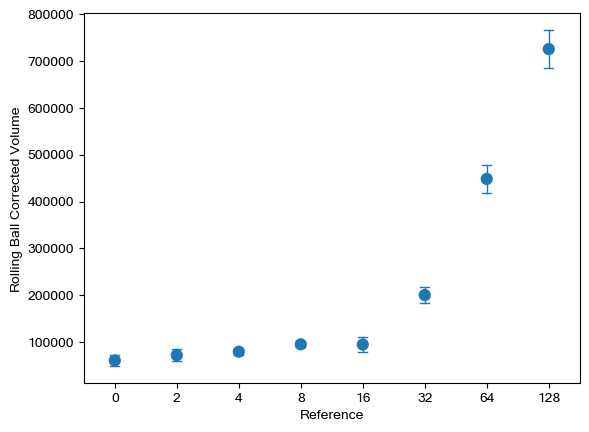

In [14]:
full_df = pd.concat(S5)

sns.pointplot(data=full_df, x='Reference', y='Rolling Ball Corrected Volume', ci='sd', join=False, capsize=0.15, errwidth=1, color='tab:blue')  

# not sure if the data can be combined 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'R15-1'),
  Text(1, 0, 'R15-2'),
  Text(2, 0, 'R14-1'),
  Text(3, 0, 'R14-2'),
  Text(4, 0, 'R13-1'),
  Text(5, 0, 'R13-2'),
  Text(6, 0, 'R12-1'),
  Text(7, 0, 'R12-2'),
  Text(8, 0, 'R11-1'),
  Text(9, 0, 'R11-2'),
  Text(10, 0, 'R10-1'),
  Text(11, 0, 'R10-2'),
  Text(12, 0, 'R9-1'),
  Text(13, 0, 'R9-2'),
  Text(14, 0, 'R8-1'),
  Text(15, 0, 'R8-2'),
  Text(16, 0, 'R7-1'),
  Text(17, 0, 'R7-2')])

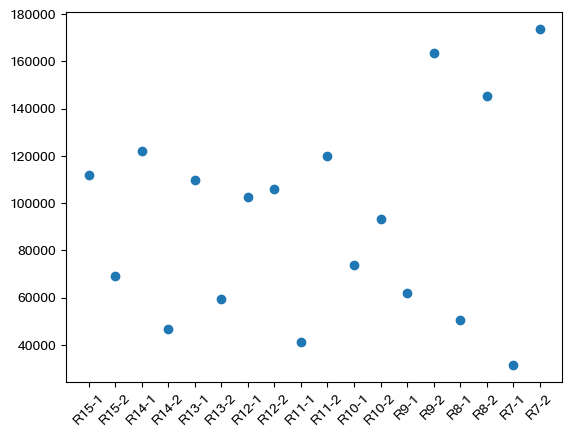

In [15]:
arun_2016_nucleic_acid_sensor.head()
plt.scatter(arun_2016_nucleic_acid_sensor['Reference'], arun_2016_nucleic_acid_sensor['Rolling Ball Corrected Volume'], color='tab:blue')
plt.xticks(rotation=45)

## Arun Miracles 2019

<Axes: xlabel='Reference', ylabel='Rolling Ball Corrected Volume'>

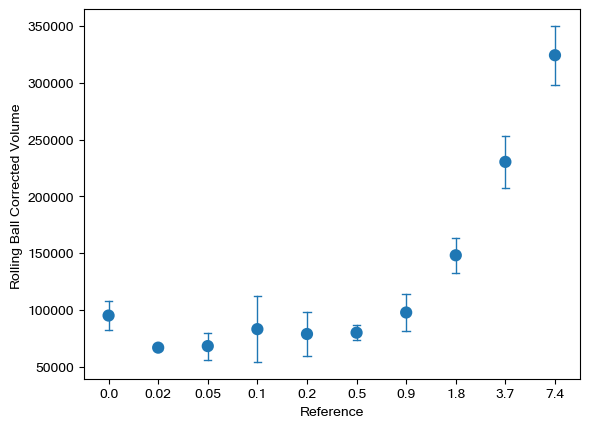

In [16]:
full_df = pd.concat([miracles_2b_1, miracles_2b_2, miracles_2b_3], ignore_index=True)

sns.pointplot(data=full_df, x='Reference', y='Rolling Ball Corrected Volume', errorbar='sd', join=False, capsize=0.15, errwidth=1, color='tab:blue')  

<Axes: xlabel='Reference', ylabel='Rolling Ball Corrected Volume'>

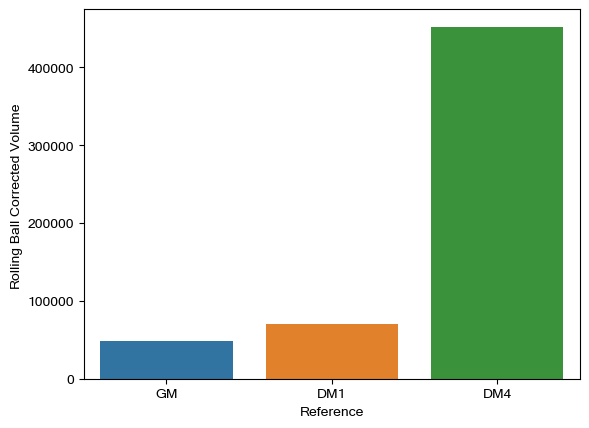

In [17]:
sns.barplot(data=miracles_3f, x='Reference', y='Rolling Ball Corrected Volume')